<a href="https://colab.research.google.com/github/alammobaDar/CCMACLRL_EXERCISES_COM231ML/blob/main/Copy_of_Exercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
      - elizerimage1.jpg
      ...
    - Eliza
      - elizaimage1.jpg
      ...
    - Elijah
      - elijahimage1.jpg
      ...
  - Test
    - testimage1.jpg
    ...
```

- Upload 190 images of your self (selfied are recommended) in the Train folder
- Upload 190 images of your partner in the Train folder
- Upload 10 images each of yourself and your partner in the Test Folder (30 images total for each member)
- Use **.png** or **.jpg** or **.jpeg** images files

In [52]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [53]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Display one raw image directly from your drive

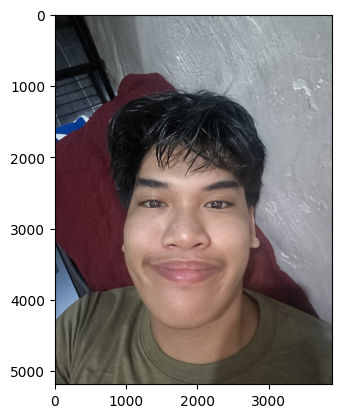

In [55]:
def display_image(image_path: str):
  image = Image.open(image_path)
  plt.imshow(image)
  plt.axis('on')
  plt.show()
display_image('/content/drive/My Drive/Images/Train/Jonel/IMG_20250930_104500.jpg')

## 2. Load the images from your drive and apply preprocessing to your raw images

In [56]:
def preprocess_images(folder):
  images = []
  labels = []

  for label, person in enumerate(os.listdir(folder)):
    person_folder = os.path.join(folder, person)
    person_name = person.split('.')[0]
    for filename in os.listdir(person_folder):
      image_path = os.path.join(person_folder, filename)
      image = cv2.imread(image_path)
      if image is not None: # Check if image is loaded successfully
          image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
          image = cv2.resize(image, (100, 100))
          images.append(image.flatten())
          labels.append(person_name)
      else:
          print(f"Warning: Could not load image at {image_path}") # Print a warning for images that could not be loaded

  return np.array(images), np.array(labels)
images, labels= preprocess_images('/content/drive/My Drive/Images/Train')

## 3. Display one pre-processed image from the training set

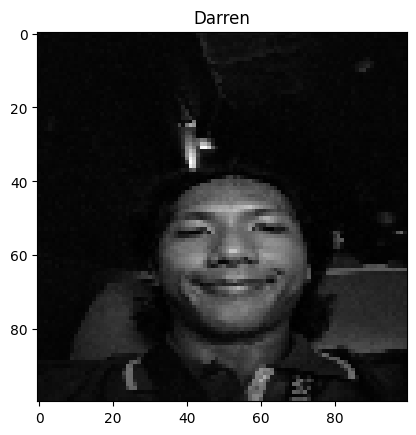

In [57]:
image = images[0].reshape(100,100)
name = labels[0]

plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')
plt.show()



## 4. Display ten pre-processed images from the training set

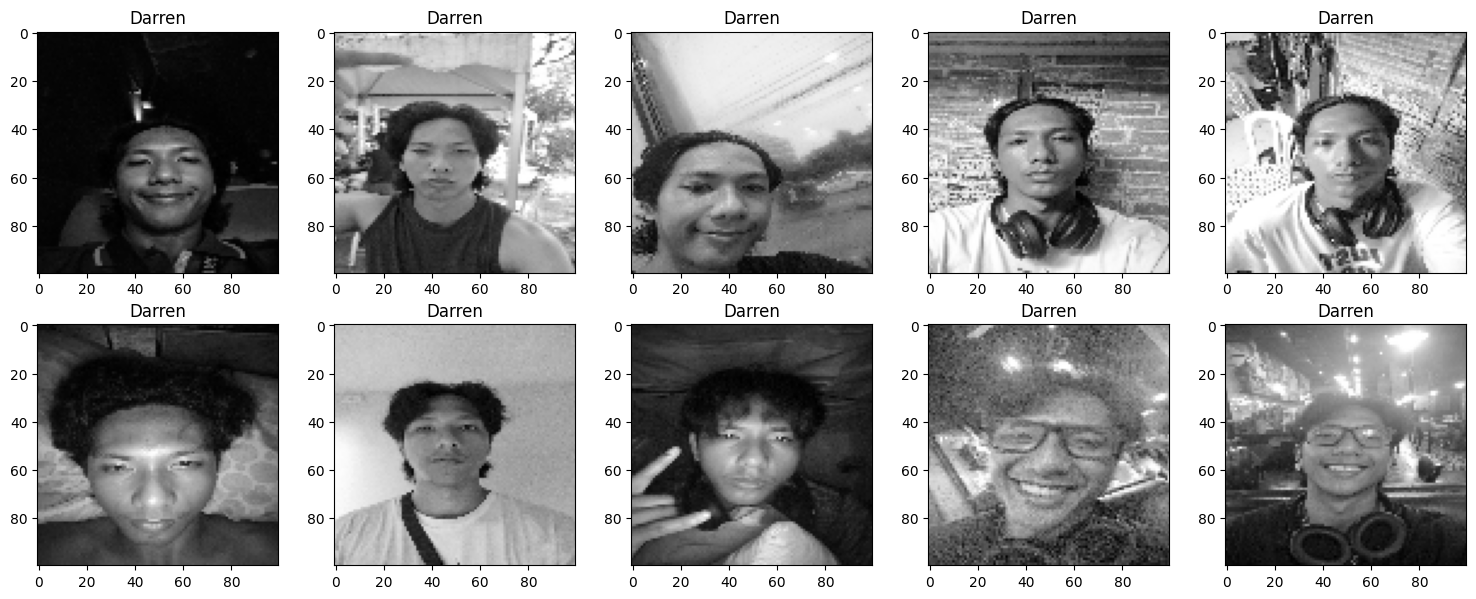

In [58]:


num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(100,100)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('on')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()



## 5. Split your training data

In [59]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.23456, random_state=5)



## 6. Train your SVM model

In [60]:


from sklearn import svm

model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(X_train, y_train)




SVC()

## 7. Evaluate your SVM model

In [61]:


from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')




Accuracy: 100.00%


## 8. Test your model using images not in your training set

Use your SVM model to predict the label of all of your images in the Test folder

Predicted label: ['Darren']
None


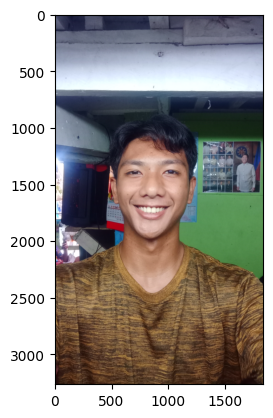

Predicted label: ['Darren']
None


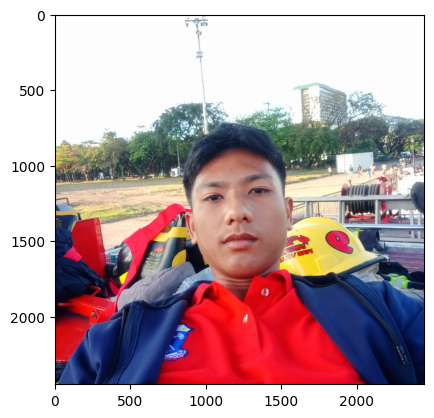

Predicted label: ['Darren']
None


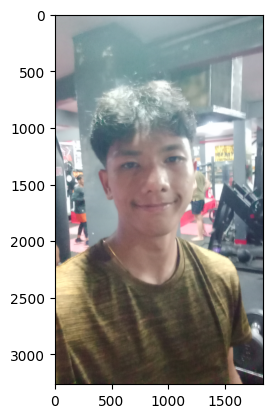

Predicted label: ['Darren']
None


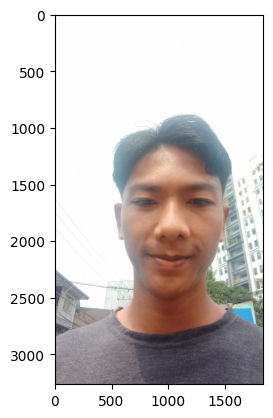

Predicted label: ['Darren']
None


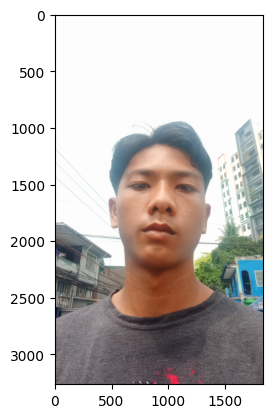

Predicted label: ['Darren']
None


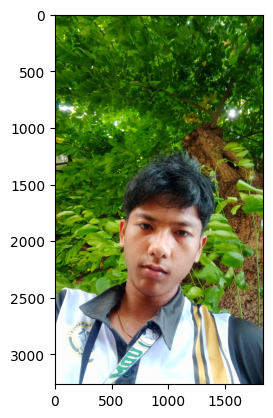

Predicted label: ['Darren']
None


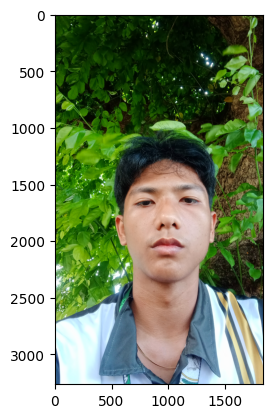

Predicted label: ['Darren']
None


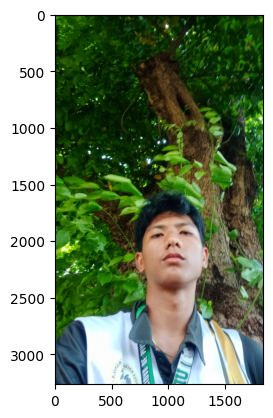

Predicted label: ['Darren']
None


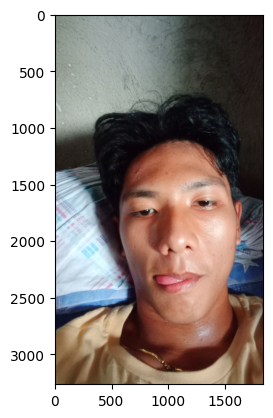

Predicted label: ['Darren']
None


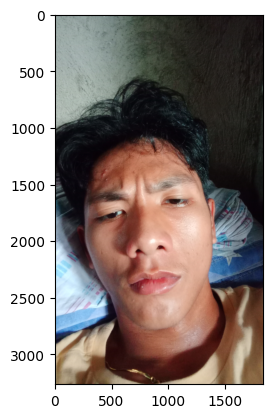

Predicted label: ['Jonel']
None


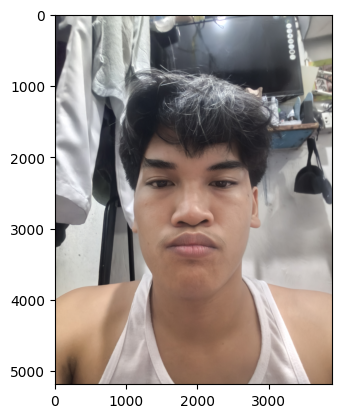

Predicted label: ['Jonel']
None


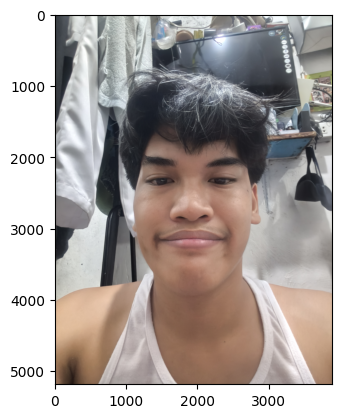

Predicted label: ['Jonel']
None


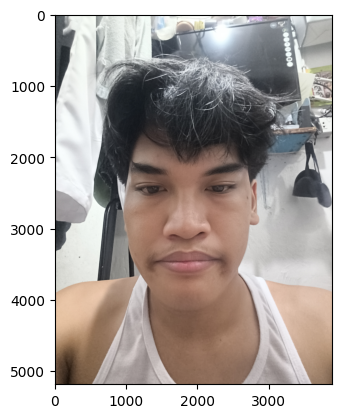

Predicted label: ['Jonel']
None


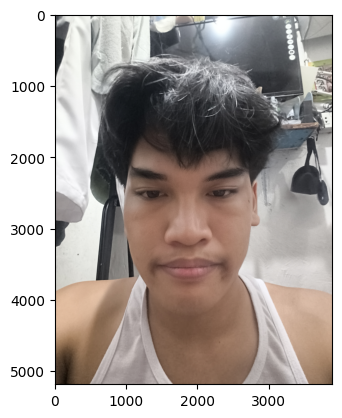

Predicted label: ['Jonel']
None


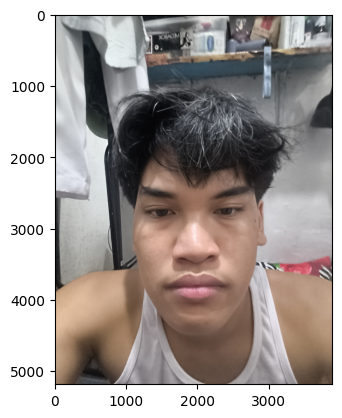

Predicted label: ['Jonel']
None


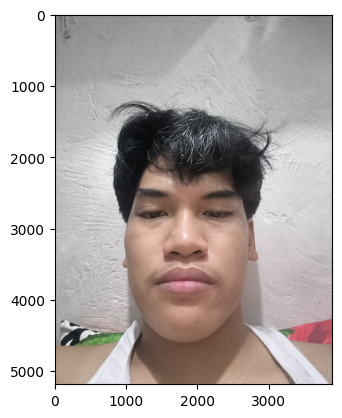

Predicted label: ['Jonel']
None


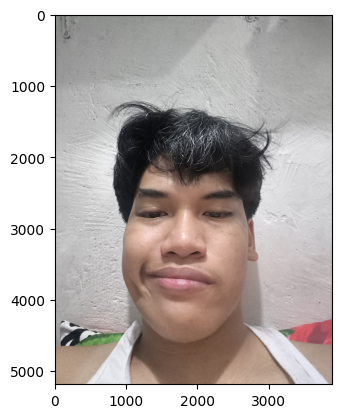

Predicted label: ['Jonel']
None


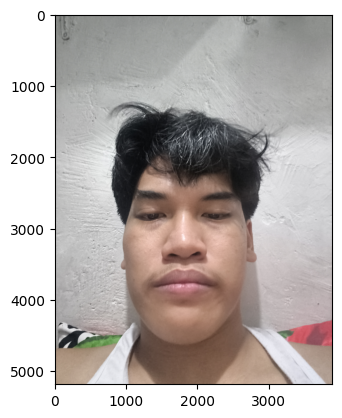

Predicted label: ['Dan']
None


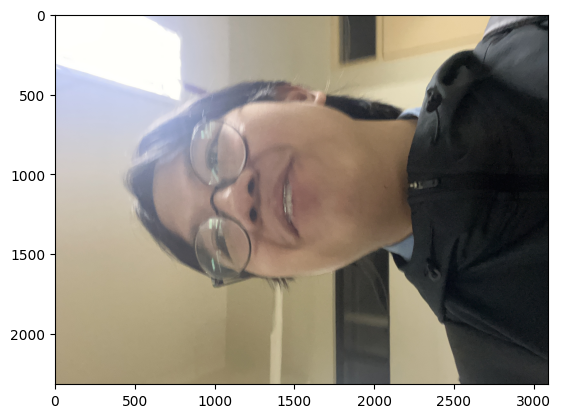

Predicted label: ['Dan']
None


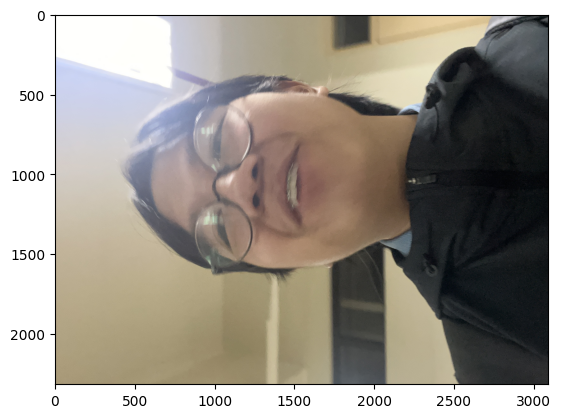

Predicted label: ['Dan']
None


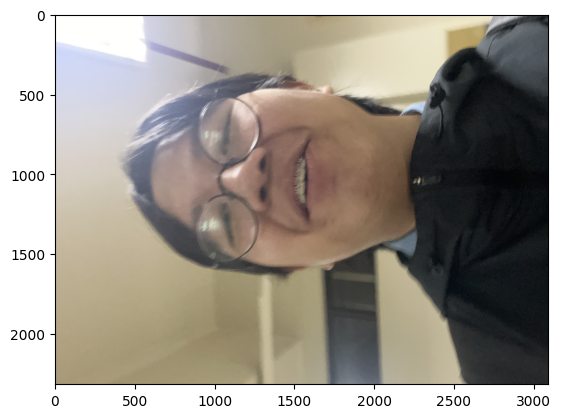

Predicted label: ['Dan']
None


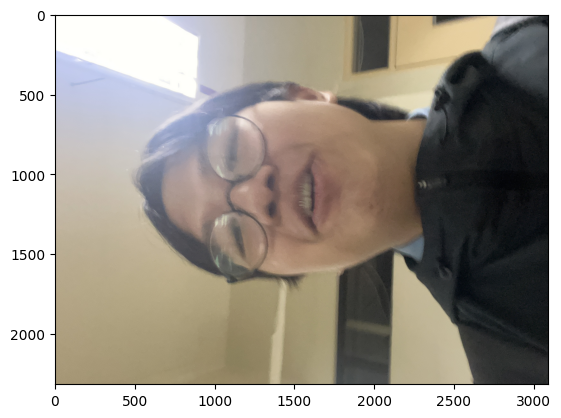

Predicted label: ['Dan']
None


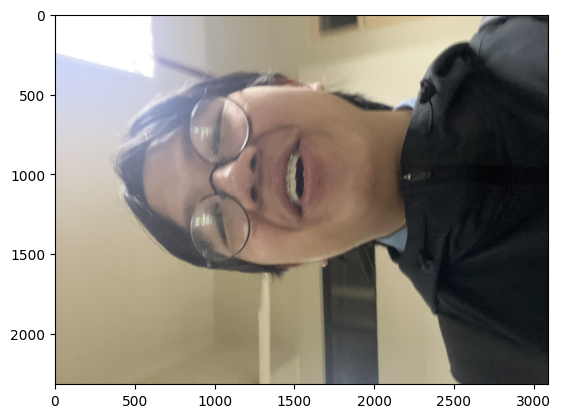

Predicted label: ['Dan']
None


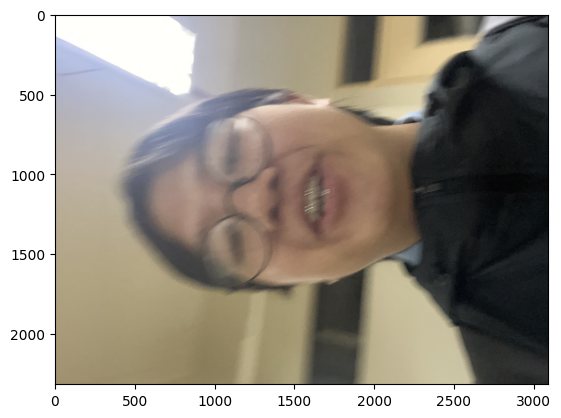

Predicted label: ['Dan']
None


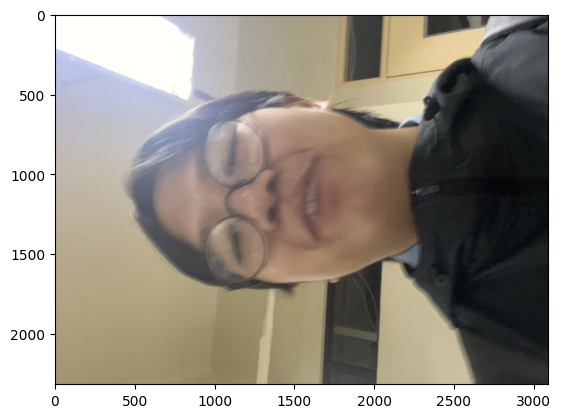

Predicted label: ['Dan']
None


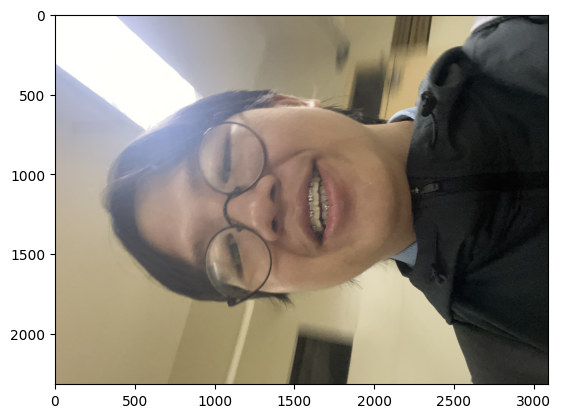

Predicted label: ['Dan']
None


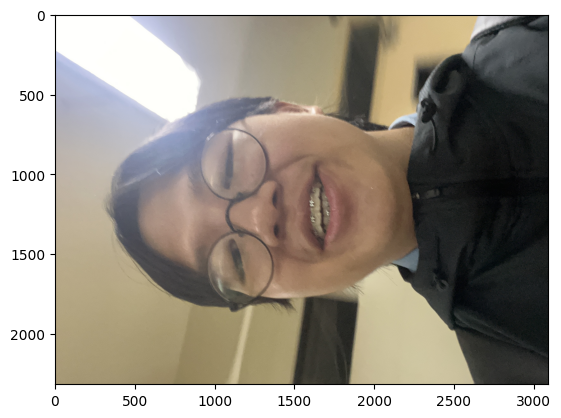

Predicted label: ['Dan']
None


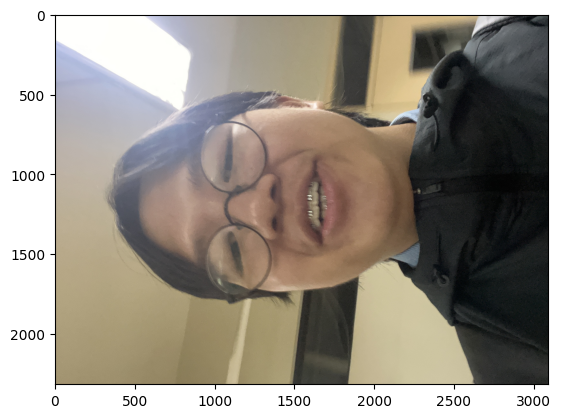

Predicted label: ['Jonel']
None


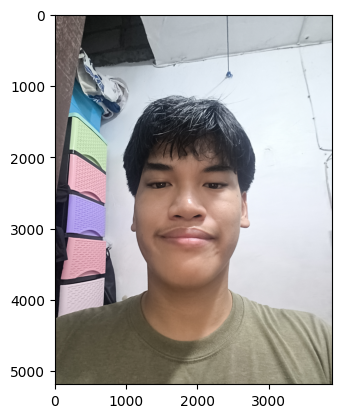

Predicted label: ['Jonel']
None


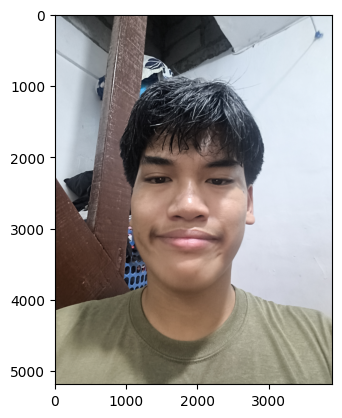

In [62]:
def preprocess_test_images(folder, model):
  image = cv2.imread(folder)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  image = cv2.resize(image, (100, 100)).flatten().reshape(1, -1)
  prediction = model.predict(image)
  return prediction

def test_images_folder(folder):
  images = []
  for filename in os.listdir(folder):
    image_path = os.path.join(folder, filename)
    image = cv2.imread(image_path)
    if image is not None:
      result = preprocess_test_images(image_path, model)
      print(print(f"Predicted label: {result}"))
      display_image(image_path)

test_images_folder('/content/drive/My Drive/Images/Test')

Predicted label: ['Darren']


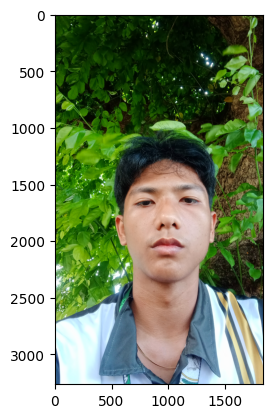

In [63]:
# For Darren
image_path = '/content/drive/My Drive/Images/Test/IMG_20230428_120905.jpg'
result = test_images(image_path, model)
print(f"Predicted label: {result}")
display_image(image_path)

Predicted label: ['Dan']


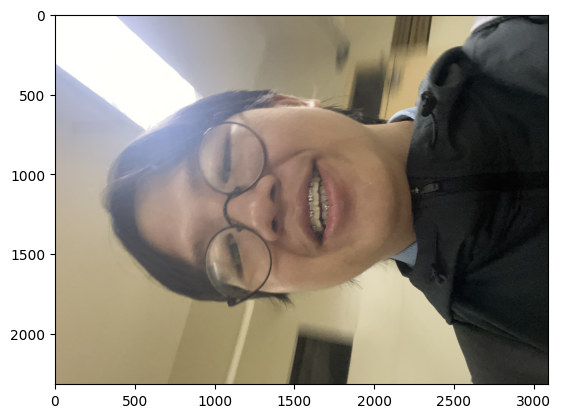

In [64]:
# For Danfred
image_path = '/content/drive/My Drive/Images/Test/IMG_1314.JPG'
result = test_images(image_path, model)
print(f"Predicted label: {result}")
display_image(image_path)

Predicted label: ['Jonel']


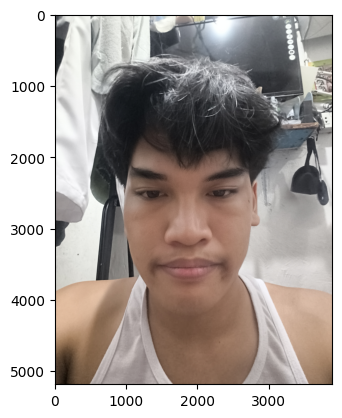

In [65]:
# For Jonel
image_path = '/content/drive/My Drive/Images/Test/IMG_20250930_213956.jpg'
result = test_images(image_path, model)
print(f"Predicted label: {result}")
display_image(image_path)